In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

filmes.columns = ["filmeId", "titulo", "generos"]

In [3]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")

avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
avaliacoes.query("filmeId==1")["nota"].mean()
# media da coluna nota

3.9209302325581397

In [8]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()


filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

# Desafio 2: Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [9]:
filmes_media = filmes.join(notas_medias_por_filme, on="filmeId").rename(columns={'nota': 'nota_media'})
filmes_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [44]:
filmes_media.sort_values("nota_media", ascending=False).head()


,filmeId,titulo,generos,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


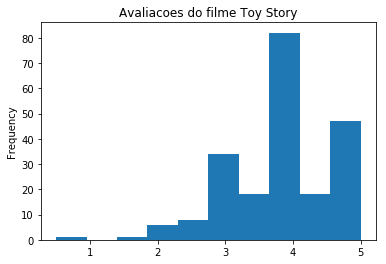

In [54]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist', title="Avaliacoes do filme Toy Story")


# Desafio 1: Determine quantos filmes não tem avaliações e quais são esses filmes.

In [12]:
filmes_sem_avaliacoes = filmes_media.query("nota_media.isnull()")
#Detalhes dos filmes sem avaliações
filmes_sem_avaliacoes
#Quantidade de filmes sem avaliações
filmes_sem_avaliacoes['filmeId'].count()

18

# Desafio 3: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [53]:
filmes_total_votos = avaliacoes.groupby("filmeId")["nota"].count()
filmes_media_total = filmes_media.join(filmes_total_votos, on="filmeId").rename(columns={'nota': 'total_votos'})
filmes_media_total.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4: Arredondar as médias (coluna de nota média) para duas casas decimais.

In [52]:
filmes_media_total['nota_media_arredondado'] = filmes_media_total['nota_media'].round(2)
filmes_media_total.head()

,filmeId,titulo,generos,nota_media,total_votos,nota_media_arredondado
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,3.07


# Desafio 5: Descobrir os generos dos filmes (quais são eles, únicos).

In [32]:
filmes_generos = filmes.generos.str.split('|', expand=True).stack()
filmes_generos.unique().tolist()


['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

# Desafio 6: Contar o número de aparições de cada genero.

In [33]:
filmes_generos = filmes_generos.reset_index(level=1, name="generos")
filmes_generos.groupby("generos").count().rename(columns={'level_1': 'total_generos'})

,total_generos
generos,
(no genres listed),34
Action,1828
Adventure,1263
Animation,611
Children,664
Comedy,3756
Crime,1199
Documentary,440
Drama,4361


# Desafio 7: Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

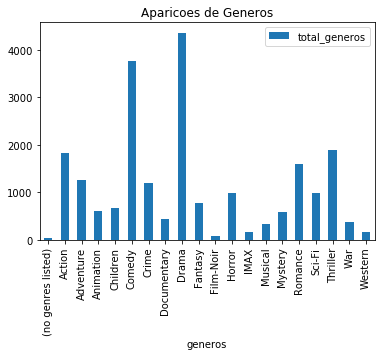

In [45]:
filmes_generos_agrupados.plot(kind='bar', title="Aparicoes de Generos")